In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations

## Fine-Tuning LLaVA on the RMET

We are looking at our results of fine-tuning the LLaVA model on the RMET task. We are looking at 5 different versions of the models: the base model and 4 fine-tuned models with different levels of training. 

## 1 RMET data

### 1.1 Loading and checking the data

In [277]:
# Just adobe runs
local_base1 = pd.read_csv('rmet_results/local_base/rmet_local_base-1.txt')
local_base2 = pd.read_csv('rmet_results/local_base/rmet_local_base-2.txt')
local_base3 = pd.read_csv('rmet_results/local_base/rmet_local_base-3.txt')
local_base4 = pd.read_csv('rmet_results/local_base/rmet_local_base-4.txt')
local_base5 = pd.read_csv('rmet_results/local_base/rmet_local_base-5.txt')

HPC_base1 = pd.read_csv('rmet_results/hyak_base/rmet_HPC_base-1.txt')
HPC_base2 = pd.read_csv('rmet_results/hyak_base/rmet_HPC_base-2.txt')
HPC_base3 = pd.read_csv('rmet_results/hyak_base/rmet_HPC_base-3.txt')
HPC_base4 = pd.read_csv('rmet_results/hyak_base/rmet_HPC_base-4.txt')
HPC_base5 = pd.read_csv('rmet_results/hyak_base/rmet_HPC_base-5.txt')

ep1_1 = pd.read_csv('rmet_results/adobe/adobe_1ep/rmet_1ep-1.txt')
ep1_2 = pd.read_csv('rmet_results/adobe/adobe_1ep/rmet_1ep-2.txt')
ep1_3 = pd.read_csv('rmet_results/adobe/adobe_1ep/rmet_1ep-3.txt')
ep1_4 = pd.read_csv('rmet_results/adobe/adobe_1ep/rmet_1ep-4.txt')
ep1_5 = pd.read_csv('rmet_results/adobe/adobe_1ep/rmet_1ep-5.txt')

ep5_1 = pd.read_csv('rmet_results/adobe/adobe_5ep/rmet_5ep-1.txt')
ep5_2 = pd.read_csv('rmet_results/adobe/adobe_5ep/rmet_5ep-2.txt')
ep5_3 = pd.read_csv('rmet_results/adobe/adobe_5ep/rmet_5ep-3.txt')
ep5_4 = pd.read_csv('rmet_results/adobe/adobe_5ep/rmet_5ep-4.txt')
ep5_5 = pd.read_csv('rmet_results/adobe/adobe_5ep/rmet_5ep-5.txt')

ep7_1 = pd.read_csv('rmet_results/adobe/adobe_7ep/rmet_7ep-1.txt')
ep7_2 = pd.read_csv('rmet_results/adobe/adobe_7ep/rmet_7ep-2.txt')
ep7_3 = pd.read_csv('rmet_results/adobe/adobe_7ep/rmet_7ep-3.txt')
ep7_4 = pd.read_csv('rmet_results/adobe/adobe_7ep/rmet_7ep-4.txt')
ep7_5 = pd.read_csv('rmet_results/adobe/adobe_7ep/rmet_7ep-5.txt')

ep10_1 = pd.read_csv('rmet_results/adobe/adobe_10ep/rmet_10ep-1.txt')
ep10_2 = pd.read_csv('rmet_results/adobe/adobe_10ep/rmet_10ep-2.txt')
ep10_3 = pd.read_csv('rmet_results/adobe/adobe_10ep/rmet_10ep-3.txt')
ep10_4 = pd.read_csv('rmet_results/adobe/adobe_10ep/rmet_10ep-4.txt')
ep10_5 = pd.read_csv('rmet_results/adobe/adobe_10ep/rmet_10ep-5.txt')

adobeFull_1ep_1 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_1ep-1.txt')
adobeFull_1ep_2 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_1ep-2.txt')
adobeFull_1ep_3 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_1ep-3.txt')

adobeFull_5ep_1 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_5ep-1.txt')
adobeFull_5ep_2 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_5ep-2.txt')
adobeFull_5ep_3 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_5ep-3.txt')

adobeFull_7ep_1 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_7ep-1.txt')
adobeFull_7ep_2 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_7ep-2.txt')
adobeFull_7ep_3 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_7ep-3.txt')
adboeFull_7ep_4 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_7ep-4.txt')
adobeFull_7ep_5 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_7ep-5.txt')

adobeFull_8ep_1 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_8ep-1.txt')
adobeFull_8ep_2 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_8ep-2.txt')
adobeFull_8ep_3 = pd.read_csv('rmet_results/adobe/adobe_full/rmet_adobeFull_8ep-3.txt')

# Add GPT
gpt_1 = pd.read_csv('../ai_results/gpt4/gpt-1.txt')
gpt_2 = pd.read_csv('../ai_results/gpt4/gpt-2.txt')
gpt_3 = pd.read_csv('../ai_results/gpt4/gpt-3.txt')

gpt_newimages_1 = pd.read_csv('../ai_results/gpt4/gpt_newimages-1.txt')
gpt_newimages_2 = pd.read_csv('../ai_results/gpt4/gpt_newimages-2.txt')

rmet = pd.concat([local_base1, local_base2, local_base3, local_base4, local_base5,
                  HPC_base1, HPC_base2, HPC_base3, HPC_base4, HPC_base5,
                  ep1_1, ep1_2, ep1_3, ep1_4, ep1_5, 
                  ep5_1, ep5_2, ep5_3, ep5_4, ep5_5, 
                  ep7_1, ep7_2, ep7_3, ep7_4, ep7_5,
                  ep10_1, ep10_2, ep10_3, ep10_4, ep10_5,
                  adobeFull_1ep_1, adobeFull_1ep_2, adobeFull_1ep_3,
                  adobeFull_5ep_1, adobeFull_5ep_2, adobeFull_5ep_3,
                  adobeFull_7ep_1, adobeFull_7ep_2, adobeFull_7ep_3, adboeFull_7ep_4, adobeFull_7ep_5,
                  adobeFull_8ep_1, adobeFull_8ep_2, adobeFull_8ep_3,
                  gpt_1, gpt_2, gpt_3,
                  gpt_newimages_1, gpt_newimages_2], axis=1)

## 2 Task performance


### 2.1 Load answers

In [278]:
answers_file = 'rmet_materials/answers.txt'
with open(answers_file, 'r') as file:
    answers = [line.strip() for line in file.readlines()]

In [279]:
answers[:10]

['playful',
 'upset',
 'desire',
 'insisting',
 'worried',
 'fantasizing',
 'uneasy',
 'despondent',
 'preoccupied',
 'cautious']

### 2.2 Check responses

In [280]:
performance = rmet.copy()

In [281]:
for model in performance.columns:
    performance[model] = [1 if performance[model][i] == answers[i] else 0 for i in range(len(answers))]

### 2.3 Calculate number correct

In [282]:
rmet_num_correct = performance.sum(axis=0)

In [283]:
rmet_num_correct

llava_local_base-1        17
llava_local_base-2        17
llava_local_base-3        17
llava_local_base-4        17
llava_local_base-5        17
llava_HPC_base-1          20
llava_HPC_base-2          20
llava_HPC_base-3          20
llava_HPC_base-4          20
llava_HPC_base-5          19
llava_1ep-1               22
llava_1ep-2               20
llava_1ep-3               21
llava_1ep-4               21
llava_1ep-5               21
llava_5ep-1               20
llava_5ep-2               23
llava_5ep-3               21
llava_5ep-4               22
llava_5ep-5               21
llava_7ep-1               22
llava_7ep-2               20
llava_7ep-3               22
llava_7ep-4               21
llava_7ep-5               22
llava_10ep-1              22
llava_10ep-2              21
llava_10ep-3              21
llava_10ep-4              20
llava_10ep-5              20
llava_adobefull_1ep-1     19
llava_adobefull_1ep-2     17
llava_adobefull_1ep-3     18
llava_adobefull_5ep-1     20
llava_adobeful

### 2.4 Calculate Performance Increase (from base model)

In [284]:
increase_performance = pd.DataFrame(rmet_num_correct)
increase_performance.columns = ['num_correct']

In [285]:
# Merge model types
increase_performance['model'] = [idx.split('-')[0] for idx in increase_performance.index]
model_performance = increase_performance.groupby('model')['num_correct'].mean()
model_performance = model_performance.reset_index()
model_performance.columns = ['model', 'num_correct']

In [286]:
# Calculate increase in performance
model_performance['percent'] = model_performance['num_correct'].apply(lambda x: x / 36)
model_performance['improvement'] = model_performance['percent'].apply(lambda x: x - model_performance[model_performance['model'] == 'llava_local_base'].percent.values[0])

In [287]:
# Desired order for the x-axis
desired_order = ['llava_local_base', 'llava_HPC_base', 'llava_1ep', 
                 'llava_5ep', 'llava_7ep', 'llava_10ep',
                 'llava_adobefull_1ep', 'llava_adobefull_5ep', 'llava_adobefull_7ep', 'llava_adobefull_8ep',
                 'gpt']

# Select only relevant columns
model_performance = model_performance[model_performance['model'].isin(desired_order)].copy()
# Sort the DataFrame based on the desired order
model_performance['model'] = pd.Categorical(model_performance['model'], categories=desired_order, ordered=True)
model_performance = model_performance.sort_values('model')

In [288]:
model_performance

,model,num_correct,percent,improvement
11,llava_local_base,17.000000,0.472222,0.000000
6,llava_HPC_base,19.800000,0.550000,0.077778
3,llava_1ep,21.000000,0.583333,0.111111
4,llava_5ep,21.400000,0.594444,0.122222
5,llava_7ep,21.400000,0.594444,0.122222
2,llava_10ep,20.800000,0.577778,0.105556
7,llava_adobefull_1ep,18.000000,0.500000,0.027778
8,llava_adobefull_5ep,19.666667,0.546296,0.074074
9,llava_adobefull_7ep,22.200000,0.616667,0.144444
10,llava_adobefull_8ep,21.000000,0.583333,0.111111


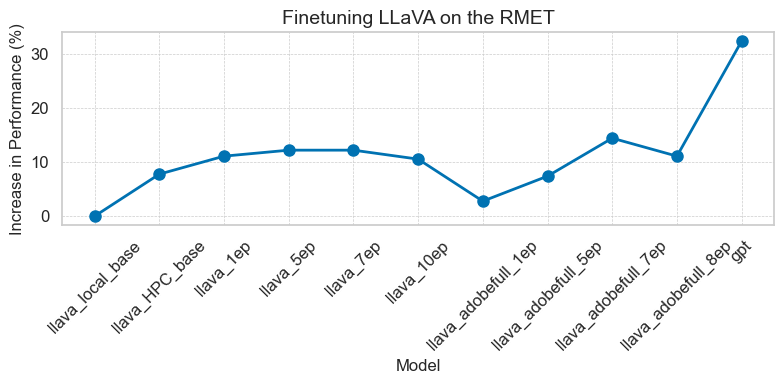

In [289]:
# Improve aesthetics with Seaborn
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(model_performance.model, round(model_performance.improvement * 100, 2), marker='o', markersize=8, linestyle='-', linewidth=2, color='#0072B2')

# Customize the visuals
plt.title("Finetuning LLaVA on the RMET", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Increase in Performance (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=12)  # Rotate for better readability
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add a grid for easier reading
plt.tight_layout()  # Adjust layout to not cut off labels

# Show plot
plt.show()

## 3 Comparing LLaVA, GPT, and Humans

### 3.1 GPT4-v vs base LLaVA

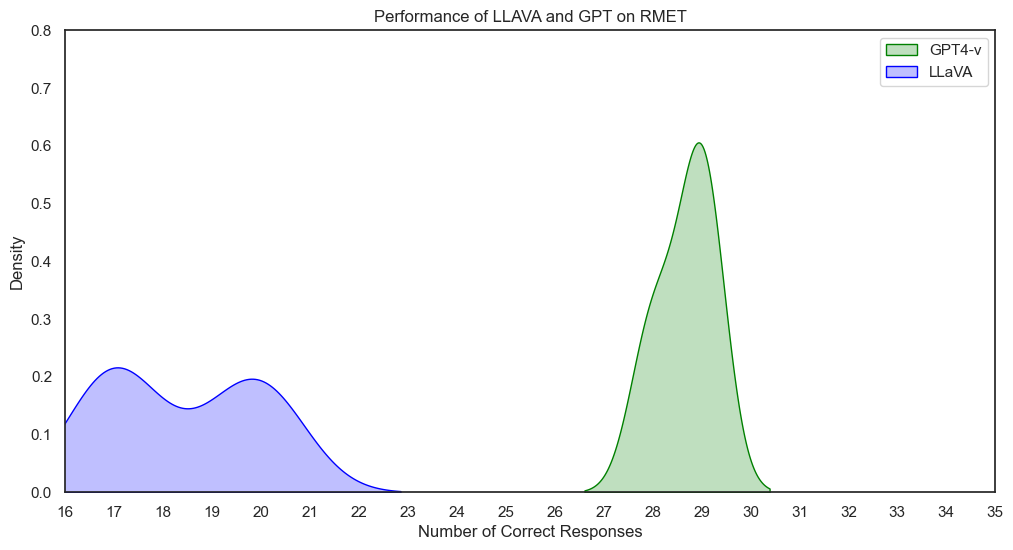

In [290]:
# Set the style to remove grid lines
sns.set_style("white")

# Create a dataframe with llava local base and HPC base performance
llava_performance = rmet_num_correct[['llava_local_base-1', 'llava_local_base-2', 'llava_local_base-3', 'llava_local_base-4', 'llava_local_base-5', 'llava_HPC_base-1', 'llava_HPC_base-2', 'llava_HPC_base-3', 'llava_HPC_base-4', 'llava_HPC_base-5']]
gpt_performance = rmet_num_correct[['gpt-1', 'gpt-2', 'gpt-3']]

performance_data = pd.concat([llava_performance, gpt_performance], axis=1)

plt.figure(figsize=(12, 6))
# sns.histplot(performance_data, palette=['blue', 'green'], bins=30, stat="count", label='Histogram')
sns.kdeplot(data=performance_data, fill=True, common_norm=False, palette=['blue', 'green'])

plt.gca().set_facecolor((1, 1, 1, 0)) 

plt.xlim([16,35])
plt.ylim([0, 0.8])
plt.xticks(range(16, 36))
plt.xlabel('Number of Correct Responses')
plt.title('Performance of LLAVA and GPT on RMET')
plt.legend(['GPT4-v', 'LLaVA'])

plt.savefig('output/llava_gpt.png', transparent=True, bbox_inches='tight')  # Save as PNG

### 3.2 Comparing fine-tuned LLaVA to GPT and humans

In [291]:
merged_num_correct = rmet_num_correct.copy()
merged_num_correct.index = pd.MultiIndex.from_tuples([(i.split('-')[0], int(i.split('-')[1])) for i in merged_num_correct.index])

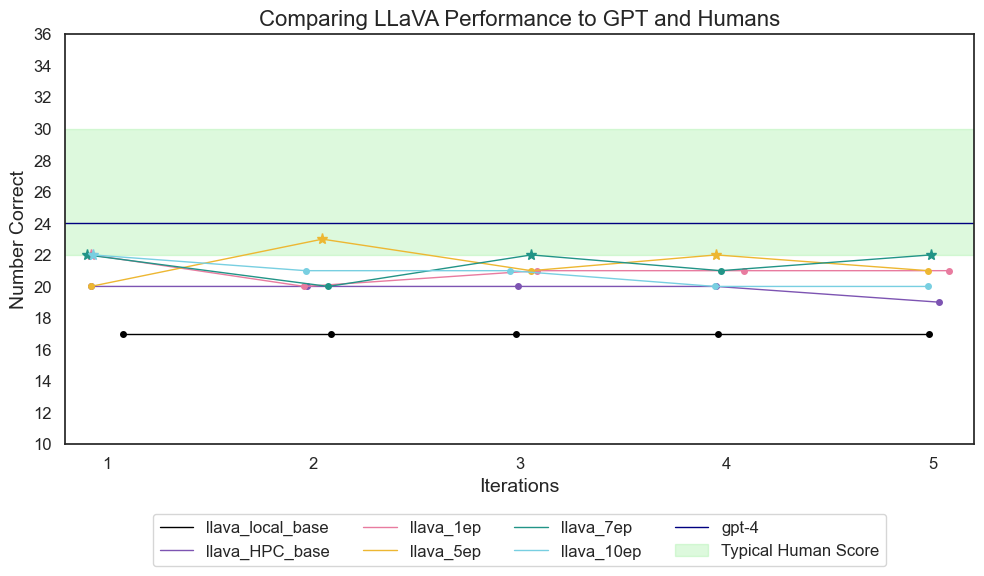

In [292]:
data = merged_num_correct[['llava_local_base', 'llava_HPC_base', 'llava_1ep', 'llava_5ep', 'llava_7ep', 'llava_10ep']].unstack().transpose()

# Line colors
line_colors = {
    'llava_local_base': 'black',
    'llava_HPC_base': '#7d54b2',
    'llava_1ep': '#e87b9f',
    'llava_5ep': '#edb732',
    'llava_7ep': '#229487',
    'llava_10ep': '#78cfe1'
}

# Plotting
plt.figure(figsize=(10, 6))  # Adjusted for better aspect ratio and space for legend

jitter_strength = 0.1  # Control the amount of horizontal jitter

# Convert DataFrame index to a numeric format if it's not already
numeric_index = np.arange(len(data.index))

for model, color in line_colors.items():
     # Apply a mild jitter to the x-values
    jittered_index = numeric_index + np.random.uniform(-jitter_strength, jitter_strength, len(data.index)) + 1

    # Plot the continuous line for the model
    plt.plot(jittered_index, data[model], label=model, linewidth=1, color=color)

    for x, y in zip(jittered_index, data[model]):
        if y > 21:
            # Plot with an alternative marker
            plt.plot(x, y, label=model if 'star' not in locals() else "", marker='*', markersize=8, linestyle='None', color=color)
            star = True
        else:
            # Plot with the default marker
            plt.plot(x, y, label=model if 'circle' not in locals() else "", marker='o', markersize=4, linestyle='None', color=color)
            circle = True

plt.plot(range(7), [24 for i in range(7)], label='gpt-4', color='#000080', linewidth=1)

# Highlighting
plt.fill_between(range(7), 22, 30, color='lightgreen', alpha=0.3, label='Typical Human Score')

plt.title('Comparing LLaVA Performance to GPT and Humans', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Number Correct', fontsize=14)
plt.xticks(range(1, 6), fontsize=12)
plt.yticks(range(10, 37, 2), fontsize=12)
plt.xlim(0.8,5.2)
# Placing the legend outside the plot (only plot lines with labels so no double label)
plt.legend(loc='upper center', fancybox=True, ncol=4, bbox_to_anchor=(0.5, -.15), fontsize=12)

plt.tight_layout()
# Removing the grid
plt.grid(False)
plt.show()

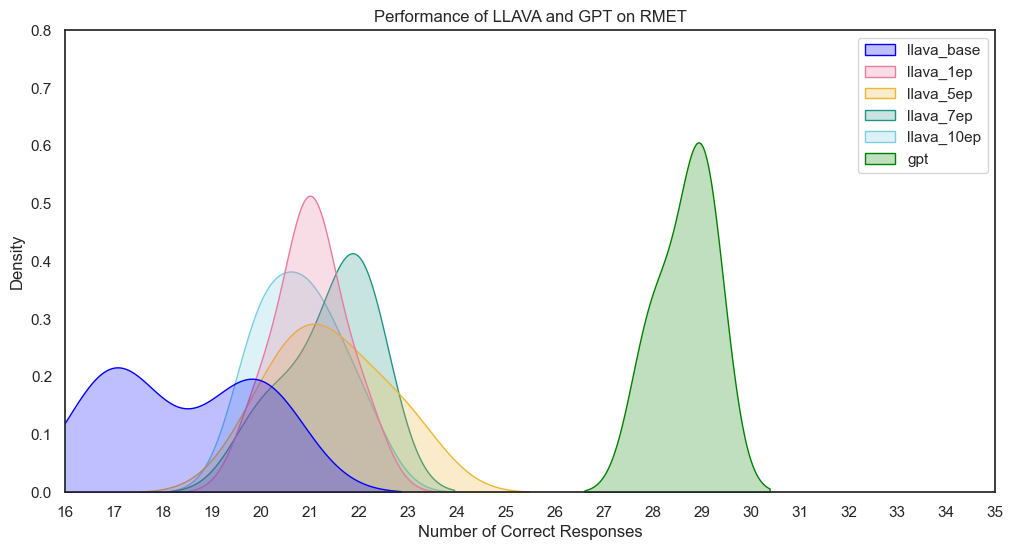

In [293]:
# Set the style to remove grid lines
sns.set_style("white")

# Create a dataframe with llava local base and HPC base performance
llava_base = rmet_num_correct[['llava_local_base-1', 'llava_local_base-2', 'llava_local_base-3', 'llava_local_base-4', 'llava_local_base-5', 'llava_HPC_base-1', 'llava_HPC_base-2', 'llava_HPC_base-3', 'llava_HPC_base-4', 'llava_HPC_base-5']]
llava_1ep = rmet_num_correct[['llava_1ep-1', 'llava_1ep-2', 'llava_1ep-3', 'llava_1ep-4', 'llava_1ep-5']]
llava_5ep = rmet_num_correct[['llava_5ep-1', 'llava_5ep-2', 'llava_5ep-3', 'llava_5ep-4', 'llava_5ep-5']]
llava_7ep = rmet_num_correct[['llava_7ep-1', 'llava_7ep-2', 'llava_7ep-3', 'llava_7ep-4', 'llava_7ep-5']]
llava_10ep = rmet_num_correct[['llava_10ep-1', 'llava_10ep-2', 'llava_10ep-3', 'llava_10ep-4', 'llava_10ep-5']]
gpt_performance = rmet_num_correct[['gpt-1', 'gpt-2', 'gpt-3']]

performance_data = pd.concat([llava_base, llava_1ep, llava_5ep, llava_7ep, llava_10ep, gpt_performance], axis=1)
performance_data.columns = ['llava_base', 'llava_1ep', 'llava_5ep', 'llava_7ep', 'llava_10ep', 'gpt']

plt.figure(figsize=(12, 6))
# sns.histplot(performance_data, palette=['blue', 'green'], bins=30, stat="count", label='Histogram')
sns.kdeplot(data=performance_data, fill=True, common_norm=False, palette=['blue', '#e87b9f', '#edb732', '#229487', '#78cfe1', 'green'])

plt.gca().set_facecolor((1, 1, 1, 0)) 

plt.xlim([16,35])
plt.ylim([0, 0.8])
plt.xticks(range(16, 36))
plt.xlabel('Number of Correct Responses')
plt.title('Performance of LLAVA and GPT on RMET')

plt.savefig('output/finetune_dist.png', transparent=True, bbox_inches='tight')  # Save as PNG

#### 3.3 Adding double the fine-tuning data

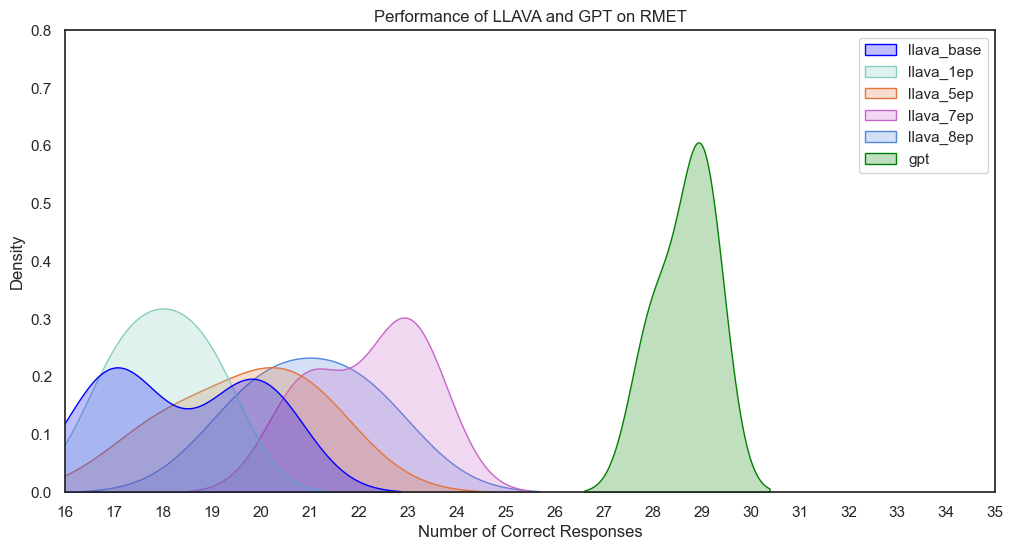

In [294]:
## Using slightly more data
# Set the style to remove grid lines
sns.set_style("white")

# Create a dataframe with llava local base and HPC base performance
llava_base = rmet_num_correct[['llava_local_base-1', 'llava_local_base-2', 'llava_local_base-3', 'llava_local_base-4', 'llava_local_base-5', 'llava_HPC_base-1', 'llava_HPC_base-2', 'llava_HPC_base-3', 'llava_HPC_base-4', 'llava_HPC_base-5']]
llava_1ep = rmet_num_correct[['llava_adobefull_1ep-1', 'llava_adobefull_1ep-2', 'llava_adobefull_1ep-3']]
llava_5ep = rmet_num_correct[['llava_adobefull_5ep-1', 'llava_adobefull_5ep-2', 'llava_adobefull_5ep-3']]
llava_7ep = rmet_num_correct[['llava_adobefull_7ep-1', 'llava_adobefull_7ep-2', 'llava_adobefull_7ep-3', 'llava_adobefull_7ep-4', 'llava_adobefull_7ep-5']]
llava_8ep = rmet_num_correct[['llava_adobefull_8ep-1', 'llava_adobefull_8ep-2']]
gpt_performance = rmet_num_correct[['gpt-1', 'gpt-2', 'gpt-3']]

# Apply jitter to 7ep since there's 0 variance naturally
llava_7ep += np.random.normal(loc=0, scale=0.05, size=len(llava_7ep))

performance_data = pd.concat([llava_base, llava_1ep, llava_5ep, llava_7ep, llava_8ep, gpt_performance], axis=1)
performance_data.columns = ['llava_base', 'llava_1ep', 'llava_5ep', 'llava_7ep', 'llava_8ep', 'gpt']

plt.figure(figsize=(12, 6))
# sns.histplot(performance_data, palette=['blue', 'green'], bins=30, stat="count", label='Histogram')
sns.kdeplot(data=performance_data, fill=True, common_norm=False, palette=['blue', '#87CEBF', '#E57439', '#C565C7', '#5387dd', 'green'])

plt.gca().set_facecolor((1, 1, 1, 0)) 

plt.xlim([16,35])
plt.ylim([0, 0.8])
plt.xticks(range(16, 36))
plt.xlabel('Number of Correct Responses')
plt.title('Performance of LLAVA and GPT on RMET')

plt.savefig('output/finetune_dist_double.png', transparent=True, bbox_inches='tight')  # Save as PNG

## 4 Item-level performance

### 4.1 Comparing item-level performance between groups

In [295]:
performance.columns

Index(['llava_local_base-1', 'llava_local_base-2', 'llava_local_base-3',
       'llava_local_base-4', 'llava_local_base-5', 'llava_HPC_base-1',
       'llava_HPC_base-2', 'llava_HPC_base-3', 'llava_HPC_base-4',
       'llava_HPC_base-5', 'llava_1ep-1', 'llava_1ep-2', 'llava_1ep-3',
       'llava_1ep-4', 'llava_1ep-5', 'llava_5ep-1', 'llava_5ep-2',
       'llava_5ep-3', 'llava_5ep-4', 'llava_5ep-5', 'llava_7ep-1',
       'llava_7ep-2', 'llava_7ep-3', 'llava_7ep-4', 'llava_7ep-5',
       'llava_10ep-1', 'llava_10ep-2', 'llava_10ep-3', 'llava_10ep-4',
       'llava_10ep-5', 'llava_adobefull_1ep-1', 'llava_adobefull_1ep-2',
       'llava_adobefull_1ep-3', 'llava_adobefull_5ep-1',
       'llava_adobefull_5ep-2', 'llava_adobefull_5ep-3',
       'llava_adobefull_7ep-1', 'llava_adobefull_7ep-2',
       'llava_adobefull_7ep-3', 'llava_adobefull_7ep-4',
       'llava_adobefull_7ep-5', 'llava_adobefull_8ep-1',
       'llava_adobefull_8ep-2', 'llava_adobefull_8ep-3 ', 'gpt-1', 'gpt-2',
       'gpt

In [296]:
llava_local_base = performance.iloc[:, 0:5].mean(axis=1).values.tolist()
llava_hpc_base = performance.iloc[:, 5:10].mean(axis=1).values.tolist()
llava_hpc_base = performance.iloc[:, 5:10].mean(axis=1).values.tolist()
llava_1ep = performance.iloc[:, 10:15].mean(axis=1).values.tolist()
llava_5ep = performance.iloc[:, 15:20].mean(axis=1).values.tolist()
llava_7ep = performance.iloc[:, 20:25].mean(axis=1).values.tolist()
llava_10ep = performance.iloc[:, 25:30].mean(axis=1).values.tolist()
llava_adobefull_1ep = performance.iloc[:, 30].values.tolist()
llava_adobefull_5ep = performance.iloc[:, 31:33].mean(axis=1).values.tolist()
llava_adobefull_7ep = performance.iloc[:, 33:35].mean(axis=1).values.tolist()
gpt = performance.iloc[:, 35:37].mean(axis=1).values.tolist()

In [297]:
as_hfa = [60.0, 73.3, 66.7, 33.3, 66.7, 86.7, 46.7, 60.0, 80.0, 66.7, 46.7, 53.3,
          60.0, 73.3, 66.7, 80.0, 53.3, 46.7, 66.7, 86.7, 53.3, 60.0, 53.3, 80.0,
          60.0, 53.5, 46.7, 40.0, 80.0, 53.3, 53.3, 46.7, 66.7, 60.0, 46.7, 66.7]

gen_pop = [85.2, 78.7, 86.1, 73.0, 77.0, 80.3, 68.0, 67.2, 77.0, 73.0, 68.0, 87.7,
           69.7, 80.3, 69.7, 77.0, 65.6, 58.2, 69.7, 88.5, 73.8, 79.5, 77.9, 73.8,
           71.3, 65.6, 65.6, 66.4, 77.9, 91.0, 51.6, 50.0, 58.2, 77.0, 65.6, 76.2]

student = [70.9, 85.4, 83.5, 87.4, 82.5, 77.7, 78.6, 83.5, 91.3, 63.1, 80.6, 83.5,
           76.7, 94.2, 83.5, 82.5, 60.2, 79.6, 58.3, 87.4, 81.6, 91.3, 84.5, 77.7,
           57.3, 81.6, 63.1, 65.0, 64.1, 89.3, 52.4, 72.8, 74.8, 81.6, 82.6, 87.4]

In [298]:
item_level = pd.DataFrame({
    'llava_local_base': [x*100 for x in llava_local_base],
    'llava_hpc_base': [x*100 for x in llava_hpc_base],
    'llava_1ep': [x*100 for x in llava_1ep],
    'llava_5ep': [x*100 for x in llava_5ep],
    'llava_7ep': [x*100 for x in llava_7ep],
    'llava_10ep': [x*100 for x in llava_10ep],
    'llava_adobefull_1ep': [x*100 for x in llava_adobefull_1ep],
    'llava_adobefull_5ep': [x*100 for x in llava_adobefull_5ep],
    'llava_adobefull_7ep': [x*100 for x in llava_adobefull_7ep],
    'gpt': [x*100 for x in gpt],
    'as_hfa': as_hfa,
    'gen_pop': gen_pop,
    'student': student
})

In [299]:
item_level_correlations = item_level[['llava_hpc_base', 'llava_adobefull_7ep', 'gpt', 'gen_pop']].corr()

#### 4.1.1 Visualize

<Axes: >

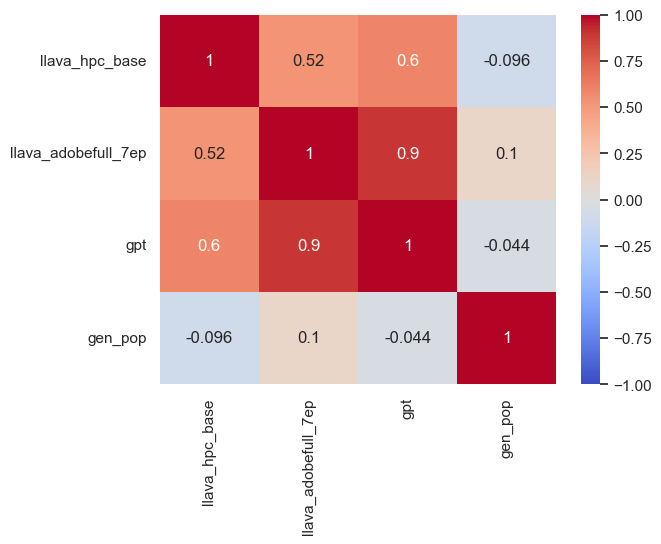

In [300]:
sns.heatmap(item_level_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### 4.2 Classify as above or below group average

In [301]:
# For each item, classify if the value is above or below the mean model performance in a new dataframe
classification = item_level.copy()

# Define a function to classify values based on mean
def classify_value(value, mean):
    return value > mean

# Apply the classification function to each column
classification = classification.apply(lambda col: classify_value(col, col.mean()))

classification.head()

,llava_local_base,llava_hpc_base,llava_1ep,llava_5ep,llava_7ep,llava_10ep,llava_adobefull_1ep,llava_adobefull_5ep,llava_adobefull_7ep,gpt,as_hfa,gen_pop,student
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,True,True,True,True,True,True,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True


In [302]:
classification_corr = classification[['llava_hpc_base', 'llava_adobefull_7ep', 'gpt', 'gen_pop']].corr()

#### 4.2.1 Visualize

<Axes: >

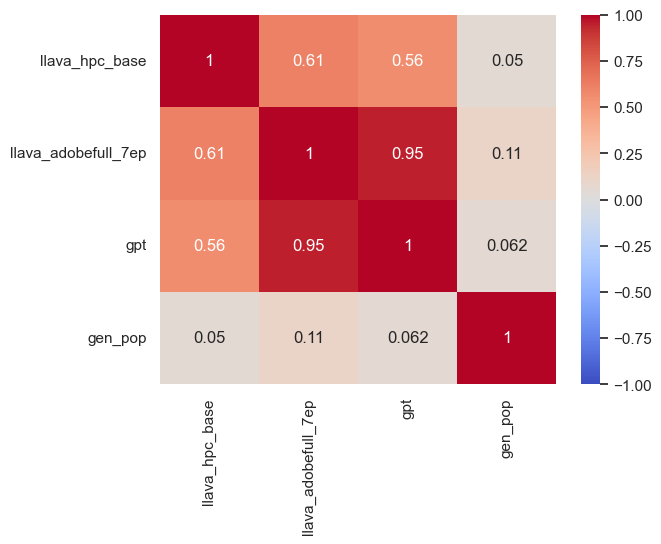

In [303]:
sns.heatmap(classification_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## 5 Deterministic

In [304]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [305]:
def determinism(list1, list2, list3, list4, list5):
    # Combine all lists to find the unique set of words
    all_words = list(set(word for lst in [list1, list2, list3, list4, list5] for word in lst))

    # Create frequency vectors
    freq_vectors = []
    for lst in [list1, list2, list3, list4, list5]:
        counter = Counter(lst)
        freq_vectors.append([counter[word] if word in counter else 0 for word in all_words])

    # Calculate pairwise cosine similarity and average them
    total_similarity = 0
    num_pairs = 0
    for vec1, vec2 in combinations(freq_vectors, 2):
        total_similarity += cosine_similarity(vec1, vec2)
        num_pairs += 1

    average_similarity = total_similarity / num_pairs
    return average_similarity

In [306]:
local_base_determ = determinism([item[0] for item in np.array(local_base1)], [item[0] for item in np.array(local_base2)], 
                                [item[0] for item in np.array(local_base3)], [item[0] for item in np.array(local_base4)],
                                [item[0] for item in np.array(local_base5)])
local_base_determ

1.0

In [307]:
hpc_base_determ = determinism([item[0] for item in np.array(HPC_base1)], [item[0] for item in np.array(HPC_base2)], 
                                [item[0] for item in np.array(HPC_base3)], [item[0] for item in np.array(HPC_base4)],
                                [item[0] for item in np.array(HPC_base5)])
hpc_base_determ

0.8672834050825274

In [308]:
ep1_determ = determinism([item[0] for item in np.array(ep1_1)], [item[0] for item in np.array(ep1_2)], 
                                [item[0] for item in np.array(ep1_3)], [item[0] for item in np.array(ep1_4)],
                                [item[0] for item in np.array(ep1_5)])
ep1_determ

0.9355346778261854

In [309]:
ep5_determ = determinism([item[0] for item in np.array(ep5_1)], [item[0] for item in np.array(ep5_2)], 
                                [item[0] for item in np.array(ep5_3)], [item[0] for item in np.array(ep5_4)],
                                [item[0] for item in np.array(ep5_5)])
ep5_determ

0.8656871623736174

In [310]:
ep7_determ = determinism([item[0] for item in np.array(ep7_1)], [item[0] for item in np.array(ep7_2)], 
                                [item[0] for item in np.array(ep7_3)], [item[0] for item in np.array(ep7_4)],
                                [item[0] for item in np.array(ep7_5)])
ep7_determ

0.9182751903647581

In [311]:
ep10_determ = determinism([item[0] for item in np.array(ep10_1)], [item[0] for item in np.array(ep10_2)], 
                                [item[0] for item in np.array(ep10_3)], [item[0] for item in np.array(ep10_4)],
                                [item[0] for item in np.array(ep10_5)])
ep10_determ

0.948601232548717

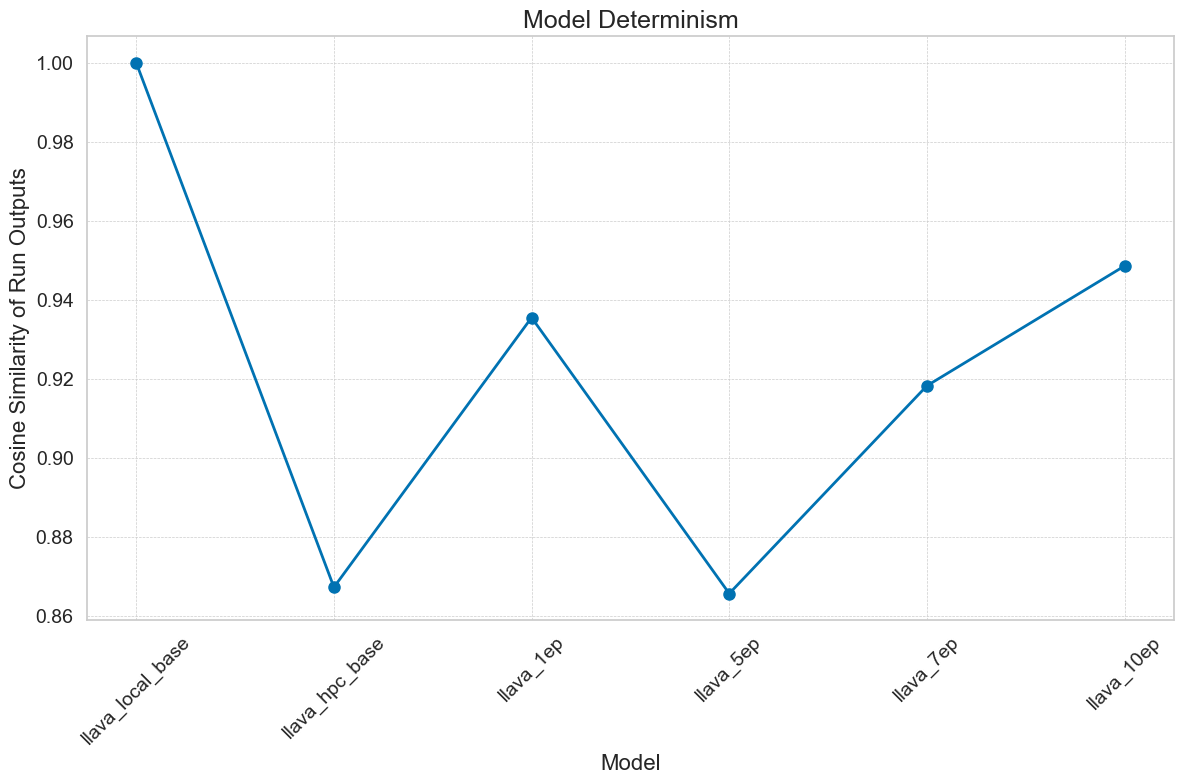

In [312]:
models = ['llava_local_base', 'llava_hpc_base', 'llava_1ep', 'llava_5ep', 'llava_7ep', 'llava_10ep']
deterministic = np.array((local_base_determ, hpc_base_determ, ep1_determ, ep5_determ, ep7_determ, ep10_determ))

# Improve aesthetics with Seaborn
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(models, deterministic, marker='o', markersize=8, linestyle='-', linewidth=2, color='#0072B2')

# Customize the visuals
plt.title("Model Determinism", fontsize=18)
plt.xlabel("Model", fontsize=16)
plt.ylabel("Cosine Similarity of Run Outputs", fontsize=16)
plt.xticks(rotation=45, fontsize=14)  # Rotate for better readability
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add a grid for easier reading
plt.tight_layout()  # Adjust layout to not cut off labels

# Show plot
plt.show()